In [1]:
import dhlab as dh
import geopy
import folium
import pandas as pd
import math

In [2]:
# read newspaper frame
df = pd.read_excel("newspapers.xlsx")
columns = list(df.columns)

# Create corpus, get metadata

In [3]:
word = "skillingsbolle"

In [4]:
corpus = dh.Corpus(doctype="digavis", fulltext=word, order_by="random", limit=1000)

# Count the number of occurences

In [5]:
counts = corpus.count(words=[word])

In [6]:
corpus.frame["split_urn"] = corpus.frame["urn"].apply(lambda x: '_'.join(x.split("_")[0:3]))

In [7]:
# merge with metadata
corpus_metadata = corpus.frame.merge(df, left_on="split_urn", right_on="id")

In [8]:
# merge with counts
counts = counts.frame.transpose().reset_index()

In [9]:
corpus_count_metadata = corpus_metadata.merge(counts, left_on="dhlabid", right_on="urn")

In [10]:
# create a decade column
corpus_count_metadata["decade"] = corpus_count_metadata["year"].apply(lambda x: math.floor(x/10) * 10)
decade_sum = corpus_count_metadata.groupby(by=["decade"])[[word]].sum()

<Axes: xlabel='decade'>

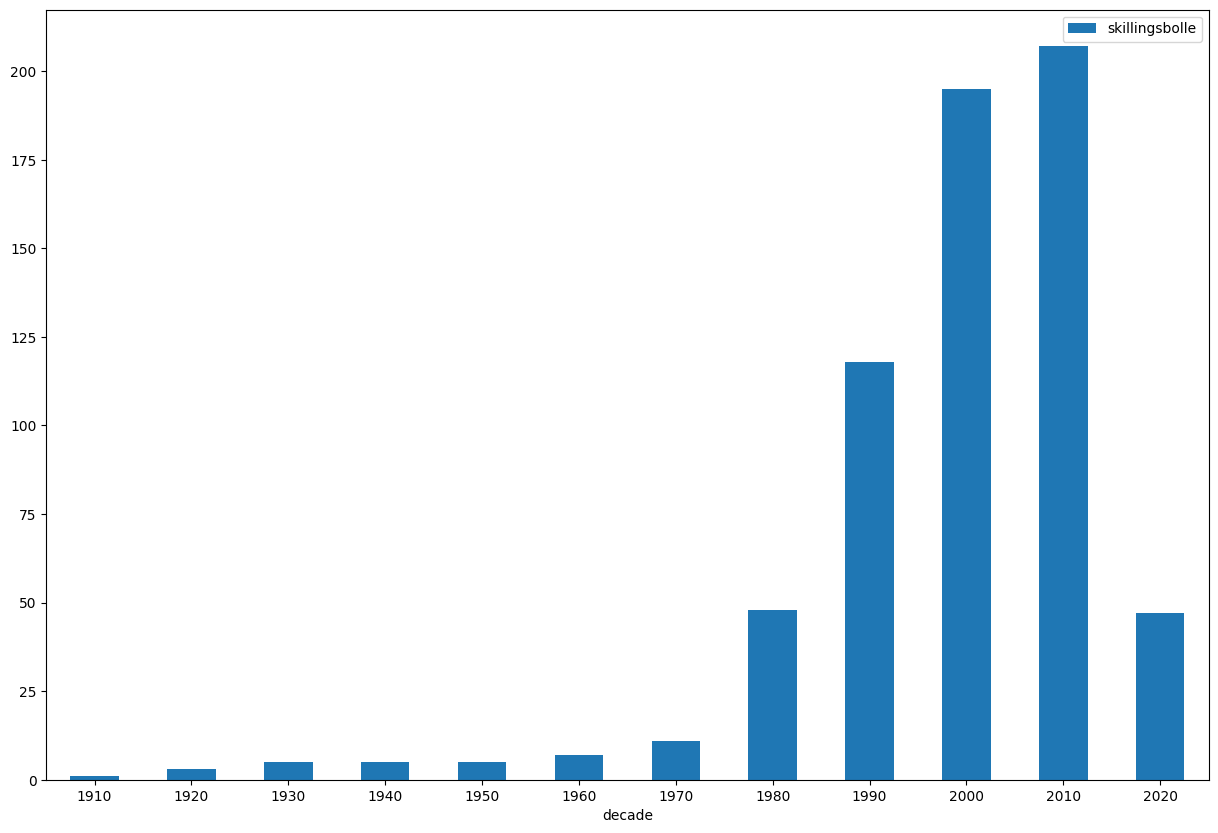

In [11]:
decade_sum.plot(kind="bar", rot=0)

In [12]:
corpus_count_metadata.groupby(by=["county"])[[word]].sum().sort_values(by=word, ascending=False)

,skillingsbolle
county,
Vestland,377.0
Oslo,71.0
Innlandet,24.0
Agder,24.0
Rogaland,24.0
Trøndelag,23.0
Akershus,23.0
Telemark,18.0
Vestfold,14.0


# Draw map

In [13]:
map_data = corpus_count_metadata.groupby(by=["place_id", "place", "county", "long", "lat"])[[word]].sum().reset_index()

In [14]:
# Ensure the 'latitude' and 'longitude' columns are numeric 
map_data['lat'] = pd.to_numeric(map_data['lat'], errors='coerce')
map_data['long'] = pd.to_numeric(map_data['long'], errors='coerce')
map_data[word] = pd.to_numeric(map_data[word], errors='coerce') 
map_data.dropna(subset=['lat', 'long', word], inplace=True)

In [15]:
m = folium.Map(location=[map_data['lat'].mean(), map_data['long'].mean()], zoom_start=6)

In [16]:
# Add markers to the map
for i, row in map_data.iterrows():
    folium.CircleMarker(location=[row['lat'], row['long']],
                        radius=row[word] / 2, # Adjust the divisor to control the size
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(m)

In [17]:
m